# **MNIST Handwritten Digit Recognition using Keras**


Without any further ado, let's see the implementation.

In [160]:
from tensorflow import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

In [144]:
data=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=data.load_data()

Let's scale it by dividing with 255 since the color value is given in the range of zero to two-fiftyfive

In [145]:
x_train=x_train/255
x_test=x_test/255

And ofcourse, Validation data is a must. 
People don't seem to use the separate validation data, but that is not the standard way to go with, cause that way our test data won't be very new to the model!

In [146]:
x_train,y_train=x_train[5000:],y_train[5000:]
x_valid,y_valid=x_train[:5000],y_train[:5000]

Time for creating a very robust model!!🤘

In [147]:
#Note: I have commented those lines that are used for regularizing the model. Don't touch it unless you want to play around with it!
model=keras.models.Sequential()
model.add(keras.layers.Input(shape=[28,28]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
#model.add(keras.layers.Dense(300,activation='relu'),kernel_regularizer=regularizers.l2(0.02))
model.add(keras.layers.Dense(200,activation='relu'))
#model.add(keras.layers.Dense(300,activation='relu'),kernel_regularizer=regularizers.l2(0.02))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_37 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                2010      
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


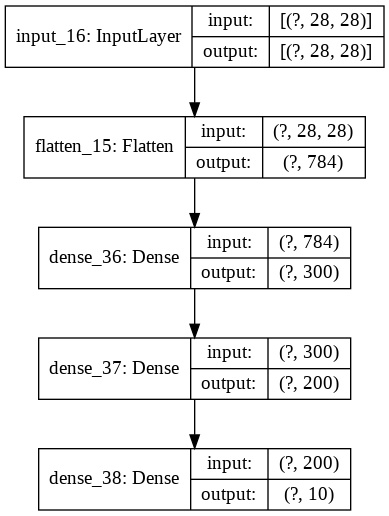

In [148]:
keras.utils.plot_model(model,show_shapes=True)

In [149]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [150]:
history=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2062 - accuracy: 0.9381 - val_loss: 0.1038 - val_accuracy: 0.9686
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0877 - accuracy: 0.9732 - val_loss: 0.0830 - val_accuracy: 0.9726
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0582 - accuracy: 0.9815 - val_loss: 0.0409 - val_accuracy: 0.9868
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.0274 - val_accuracy: 0.9926
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.0234 - val_accuracy: 0.9944
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0352 - val_accuracy: 0.9892
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.0168 - val_accuracy:

Okay. Done with fitting. Let's analyze our model's performance using some graphs.

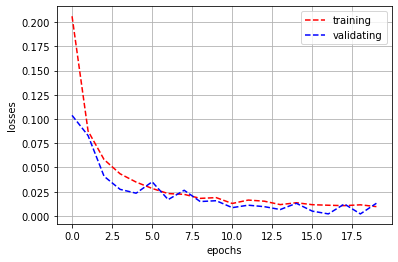

In [158]:
plt.plot(history.history['loss'],'r--')
plt.plot(history.history['val_loss'],'b--')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(['training','validating'])


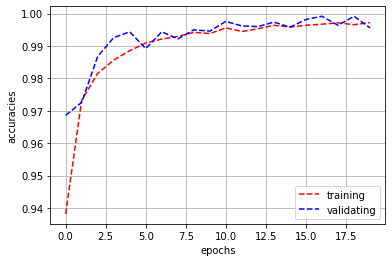

In [159]:
plt.plot(history.history['accuracy'],'r--')
plt.plot(history.history['val_accuracy'],'b--')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracies')
plt.legend(['training','validating'])

In [154]:
mse=model.evaluate(x_test,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.9796


Here it shows the accuracy I obtained is almost cent per cent. But wait! This can be due to overfitting too!

I will check the performance using regularizers and come to the conclusing if the model contained overfitting issues or not.


In [155]:
x_test[:10]
y_test[:10]
y_pred=model.predict(x_test[:10])
y_pred
y_pred=np.round(y_pred)
#here y_pred gave me 10 values. So the value which is the highest one is the corresponding number's location.

In [156]:
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]


In [157]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

while using no regularizer, it gave me accuracy of 0.9796. So this might or might not be due to overfitting. Still,
while using regularizer l2 with p value 0.05, I got accuracy of 0.9174

## SEE YOU IN THE NEXT CODE! 